In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from xgboost import XGBClassifier

In [20]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [21]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [22]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [23]:
df.shape

(907, 27)

In [24]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [27]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.sample()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
205,IND,India,Enercon Babarzar Wind Farm,WRI1026670,11.2,22.1421,69.8442,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [26]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Null Values

In [29]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [30]:
df.drop(['other_fuel1'],axis=1,inplace=True)
df.drop(['other_fuel2'],axis=1,inplace=True)
df.drop(['other_fuel3'],axis=1,inplace=True)
df.drop(['owner'],axis=1,inplace=True)
df.drop(['wepp_id'],axis=1,inplace=True)
df.drop(['generation_gwh_2013'],axis=1,inplace=True)
df.drop(['generation_gwh_2015'],axis=1,inplace=True)
df.drop(['generation_gwh_2016'],axis=1,inplace=True)
df.drop(['generation_gwh_2017'],axis=1,inplace=True)
df.drop(['generation_gwh_2018'],axis=1,inplace=True)
df.drop(['generation_gwh_2019'],axis=1,inplace=True)
df.drop(['generation_data_source'],axis=1,inplace=True)
df.drop(['estimated_generation_gwh'],axis=1,inplace=True)














In [31]:
df.shape

(907, 14)

In [32]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000


In [33]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'url', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2014'],
      dtype='object')

In [34]:
df.isnull().sum()

country                    0
country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
dtype: int64

In [35]:
df.drop(['generation_gwh_2014'],axis=1,inplace=True)


In [36]:
df.isnull().sum()

country                    0
country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                907 non-null    object 
 1   country_long           907 non-null    object 
 2   name                   907 non-null    object 
 3   gppd_idnr              907 non-null    object 
 4   capacity_mw            907 non-null    float64
 5   latitude               861 non-null    float64
 6   longitude              861 non-null    float64
 7   primary_fuel           907 non-null    object 
 8   commissioning_year     527 non-null    float64
 9   source                 907 non-null    object 
 10  url                    907 non-null    object 
 11  geolocation_source     888 non-null    object 
 12  year_of_capacity_data  519 non-null    float64
dtypes: float64(5), object(8)
memory usage: 92.2+ KB


In [39]:
df.dtypes

country                   object
country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year       float64
source                    object
url                       object
geolocation_source        object
year_of_capacity_data    float64
dtype: object

# Fill missing values

In [40]:
df['latitude']=df['latitude'].fillna(np.mean(df['latitude']))
df['longitude']=df['longitude'].fillna(np.mean(df['longitude']))
df['commissioning_year']=df['commissioning_year'].fillna(np.mean(df['commissioning_year']))
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(np.mean(df['year_of_capacity_data']))

In [41]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
url                       0
geolocation_source       19
year_of_capacity_data     0
dtype: int64

In [42]:
df["geolocation_source"]=df["geolocation_source"].fillna(df.geolocation_source.dropna().mode()[0])


In [43]:
df.isnull().sum()

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
dtype: int64

In [45]:
import seaborn as sns

<AxesSubplot:>

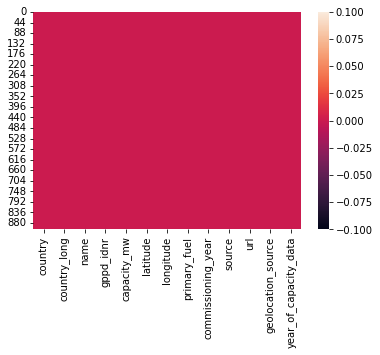

In [46]:
sns.heatmap(df.isnull())

Since we can see that there is no null values in dataset

In [47]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,1997.091082,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.000000,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.000000,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0


In [48]:
df.dtypes

country                   object
country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year       float64
source                    object
url                       object
geolocation_source        object
year_of_capacity_data    float64
dtype: object

In [50]:
df['country'].nunique()

1

In [51]:
df['country_long'].nunique()

1

In [52]:
df['name'].nunique()

907

In [53]:
df['gppd_idnr'].nunique()

907

In [54]:
df['capacity_mw'].nunique()

361

In [55]:
df['latitude'].nunique()

837

In [56]:
df['longitude'].nunique()

828

In [57]:
df['primary_fuel'].nunique()

8

In [58]:
df['commissioning_year'].nunique()

74

In [59]:
df['source'].nunique()

191

In [60]:
df['url'].nunique()

304

In [61]:
df['geolocation_source'].nunique()

3

In [63]:
df['year_of_capacity_data'].nunique()

1

# Encoding

In [65]:
le=LabelEncoder()
df['country']=le.fit_transform(df['country'])
df['country_long']=le.fit_transform(df['country_long'])
df['source']=le.fit_transform(df['source'])
df['url']=le.fit_transform(df['url'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])







In [68]:
df['primary_fuel']=le.fit_transform(df['primary_fuel'])


In [66]:
df.drop(['name'],axis=1,inplace=True)
df.drop(['gppd_idnr'],axis=1,inplace=True)



In [69]:
df

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data
0,0,0,2.5,28.1839,73.2407,6,2011.000000,109,128,1,2019.0
1,0,0,98.0,24.7663,74.6090,1,1997.091082,174,173,2,2019.0
2,0,0,39.2,21.9038,69.3732,7,1997.091082,21,205,2,2019.0
3,0,0,135.0,23.8712,91.3602,2,2004.000000,22,58,2,2019.0
4,0,0,1800.0,21.9603,82.4091,1,2015.000000,22,58,2,2019.0
...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,1600.0,16.2949,77.3568,1,2016.000000,22,58,2,2019.0
903,0,0,3.0,12.8932,78.1654,6,1997.091082,77,22,0,2019.0
904,0,0,25.5,15.2758,75.5811,7,1997.091082,21,260,2,2019.0
905,0,0,80.0,24.3500,73.7477,1,1997.091082,59,82,2,2019.0


In [70]:
import seaborn as sns

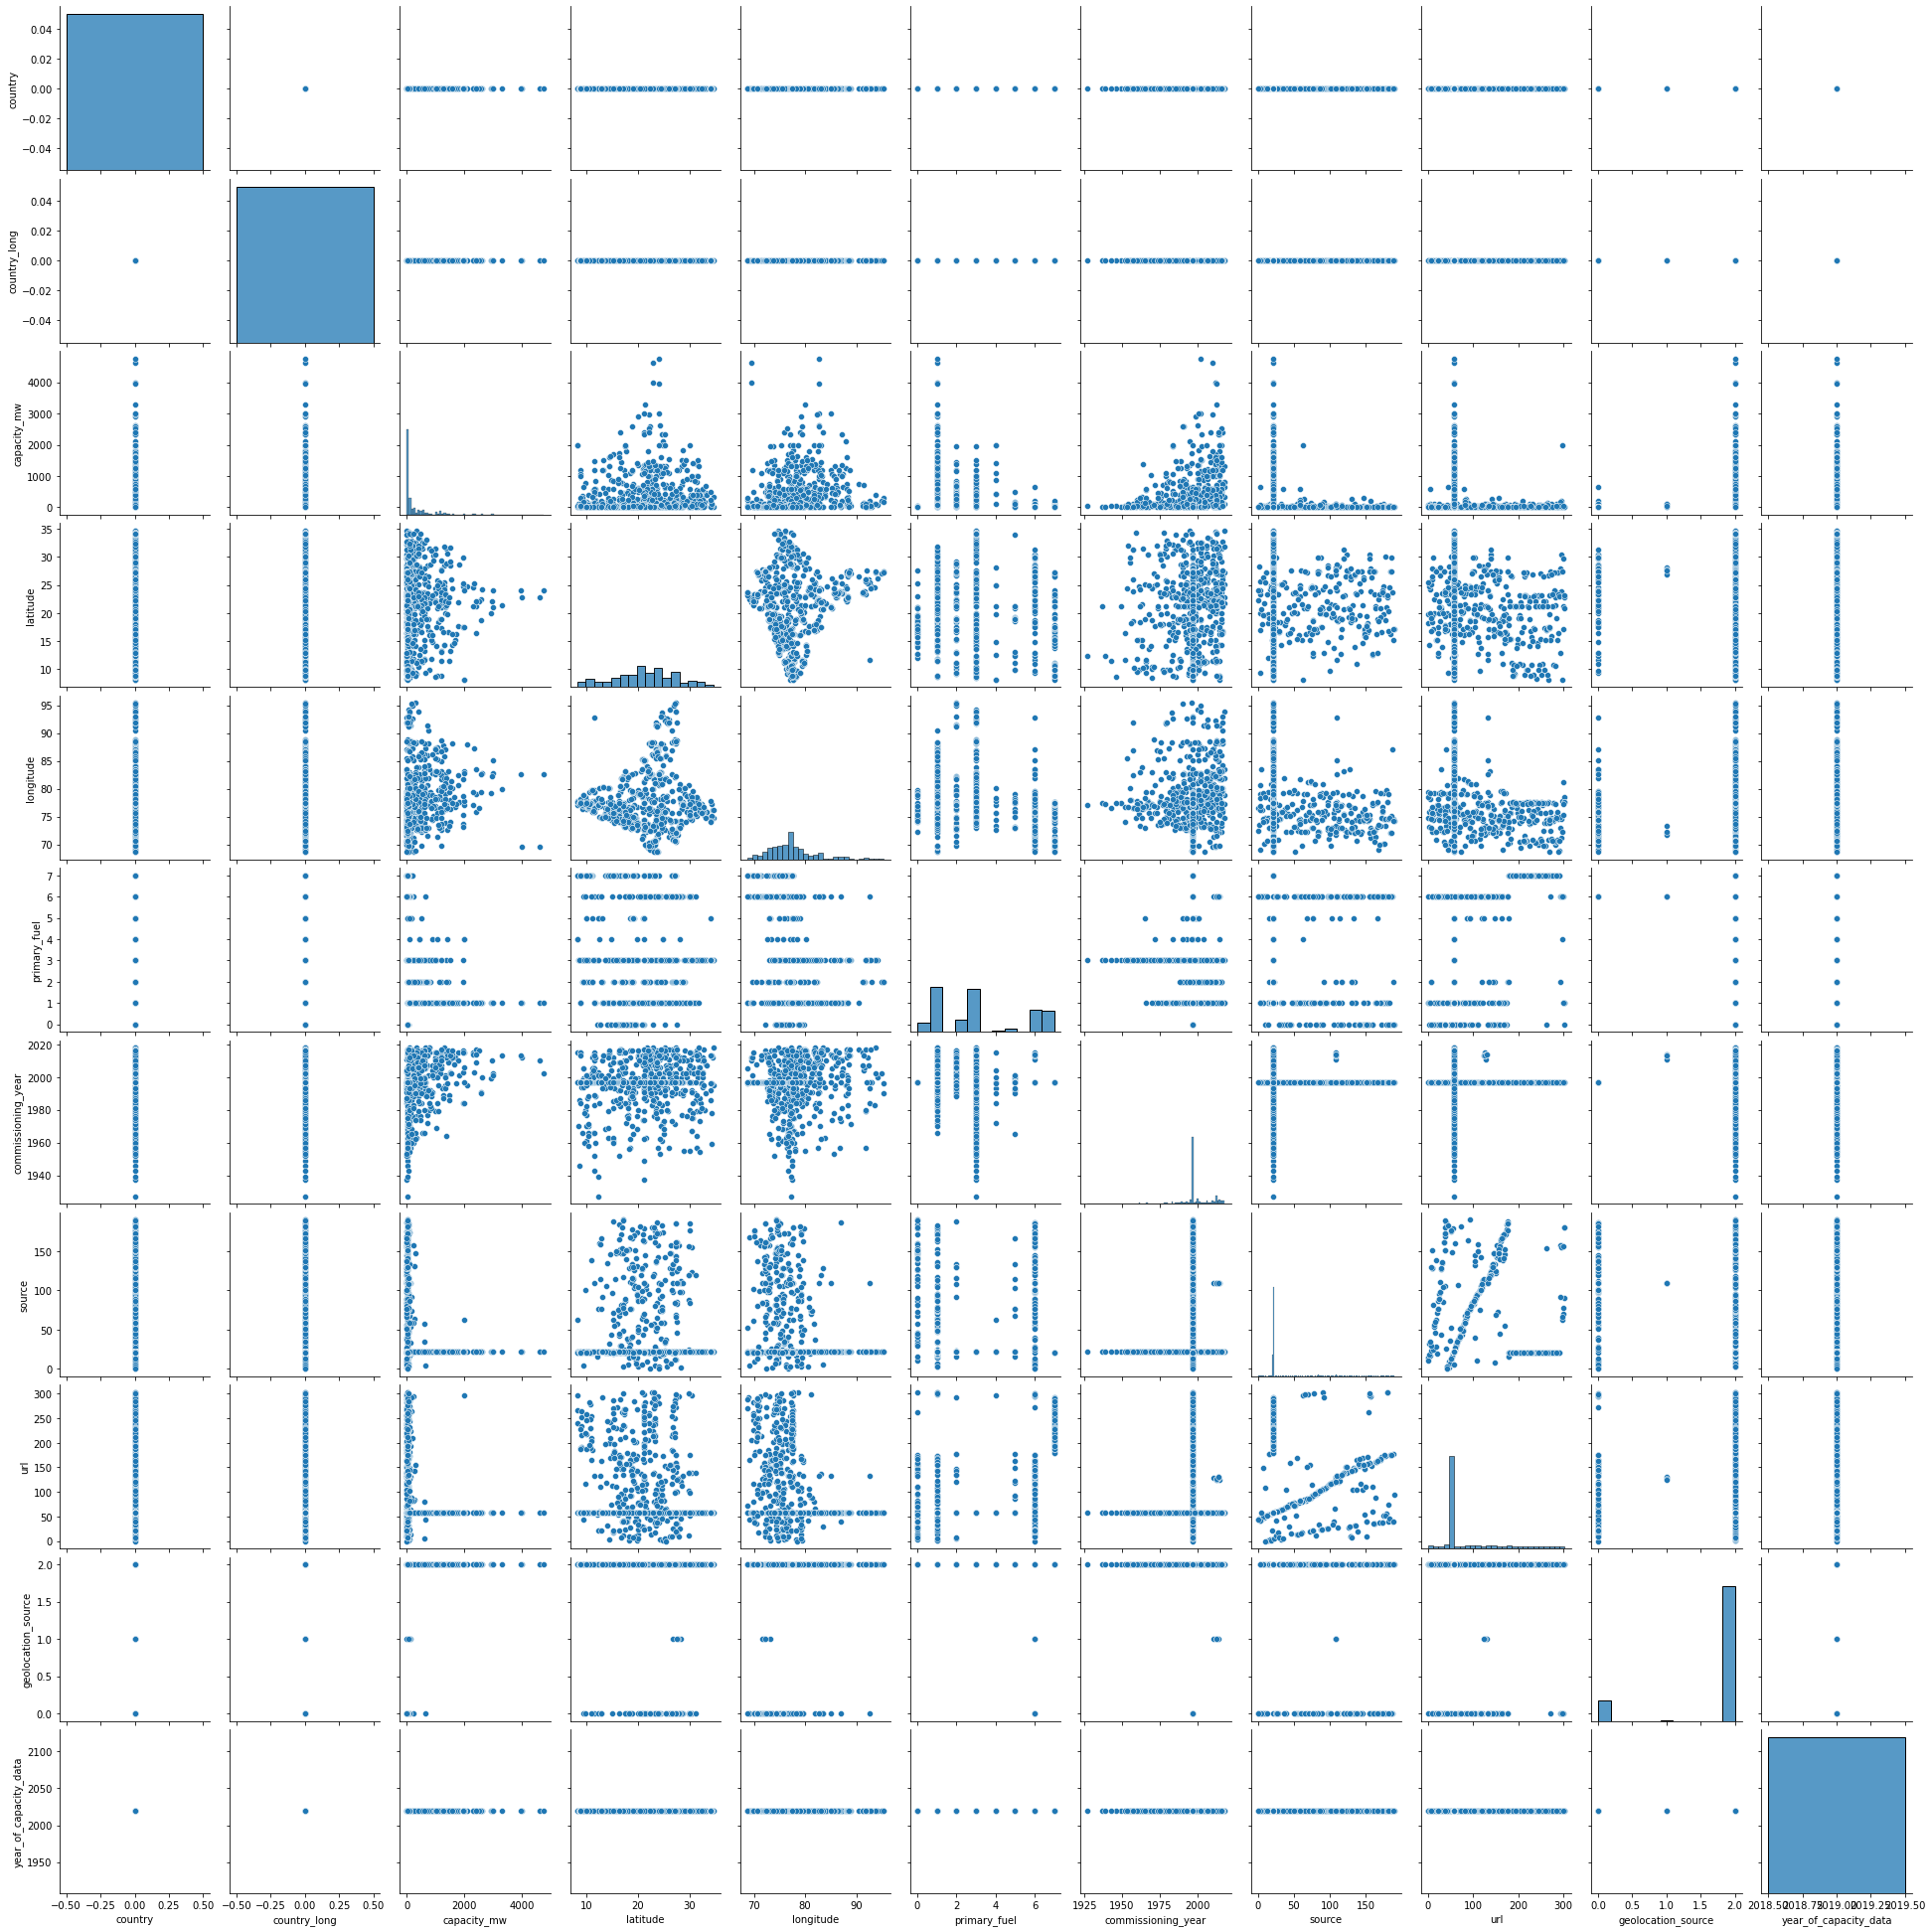

In [71]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

<AxesSubplot:>

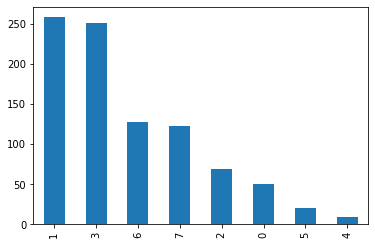

In [72]:
df['primary_fuel'].value_counts().plot(kind='bar')


<AxesSubplot:>

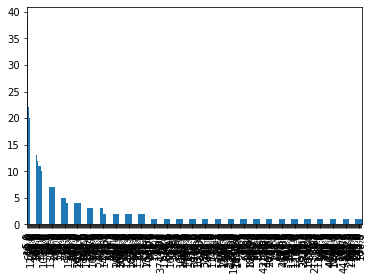

In [73]:
df['capacity_mw'].value_counts().plot(kind='bar')


In [74]:
df['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

# Describing datasets

In [76]:
df.describe()

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data
count,907.0,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0
mean,0.0,0.0,326.223755,21.197918,77.464907,3.206174,1997.091082,43.847850,94.469680,1.733186,2019.0
std,0.0,0.0,590.085456,6.079148,4.812291,2.280652,13.016360,44.642818,70.381222,0.677151,0.0
min,0.0,0.0,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,2019.0
25%,0.0,0.0,16.725000,17.072000,74.388900,1.000000,1997.091082,22.000000,58.000000,2.000000,2019.0
50%,0.0,0.0,59.200000,21.281800,76.979200,3.000000,1997.091082,22.000000,58.000000,2.000000,2019.0
75%,0.0,0.0,385.250000,25.176450,79.206100,6.000000,2003.000000,29.500000,115.500000,2.000000,2019.0
max,0.0,0.0,4760.000000,34.649000,95.408000,7.000000,2018.000000,190.000000,303.000000,2.000000,2019.0


In [78]:
df.skew().sort_values()

geolocation_source      -2.159841
commissioning_year      -1.399359
latitude                -0.149698
country                  0.000000
country_long             0.000000
year_of_capacity_data    0.000000
primary_fuel             0.472251
longitude                1.141881
url                      1.510537
source                   1.827373
capacity_mw              3.123576
dtype: float64

In [102]:
df.drop(['country'],axis=1,inplace=True)
df.drop(['country_long'],axis=1,inplace=True)
df.drop(['year_of_capacity_data'],axis=1,inplace=True)



<AxesSubplot:>

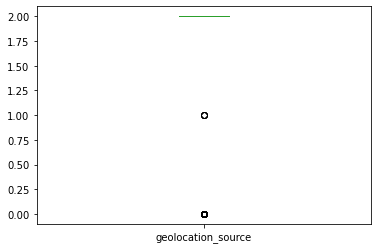

In [103]:
df['geolocation_source'].plot.box()

<AxesSubplot:>

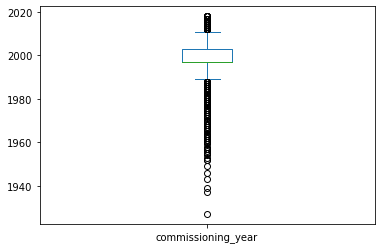

In [104]:
df['commissioning_year'].plot.box()

<AxesSubplot:>

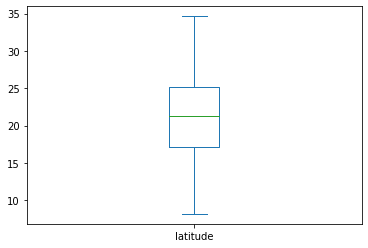

In [105]:
df['latitude'].plot.box()

<AxesSubplot:>

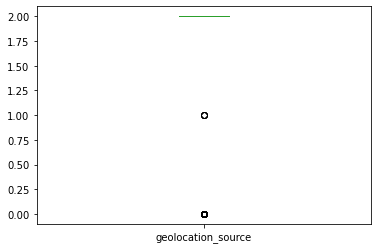

In [106]:
df['geolocation_source'].plot.box()

<AxesSubplot:>

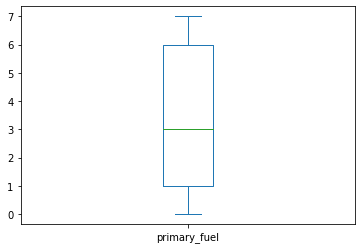

In [107]:
df['primary_fuel'].plot.box()

<AxesSubplot:>

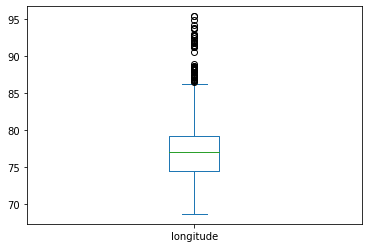

In [108]:
df['longitude'].plot.box()

<AxesSubplot:>

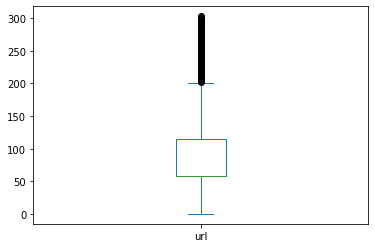

In [109]:
df['url'].plot.box()

<AxesSubplot:>

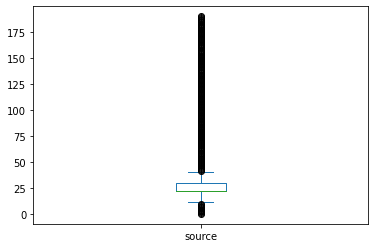

In [110]:
df['source'].plot.box()

<AxesSubplot:>

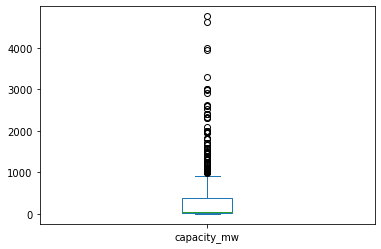

In [111]:
df['capacity_mw'].plot.box()

capacity_mw              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
latitude              AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
longitude             AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
primary_fuel          AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
commissioning_year    AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
source                AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
url                   AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
geolocation_source          AxesSubplot(0.125,0.125;0.0945122x0.343182)
dtype: object

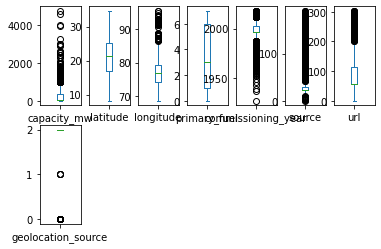

In [112]:
df.plot(kind='box',subplots=True,layout=(2,7))

In [113]:
#removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df))

In [114]:
# threshold for zscore -----> above 3 are considered outliers

threshold=3
print(np.where(z>3))

(array([ 15,  71,  80, 143, 147, 179, 183, 191, 209, 222, 244, 299, 308,
       321, 323, 333, 340, 342, 345, 360, 363, 364, 371, 375, 416, 427,
       444, 454, 478, 482, 484, 493, 494, 499, 519, 538, 541, 546, 573,
       577, 583, 592, 601, 621, 638, 648, 657, 661, 669, 689, 695, 706,
       709, 726, 728, 767, 786, 788, 807, 808, 818, 832, 847, 848, 870,
       871, 879, 880, 895, 900], dtype=int64), array([0, 5, 5, 0, 0, 2, 2, 5, 0, 4, 2, 5, 0, 5, 2, 2, 2, 4, 5, 2, 0, 0,
       4, 0, 2, 2, 4, 4, 4, 0, 4, 0, 0, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       2, 0, 0, 5, 5, 5, 0, 4, 4, 0, 4, 0, 0, 0, 4, 0, 2, 5, 2, 4, 5, 5,
       5, 0, 5, 5], dtype=int64))


In [115]:
z.iloc[15][2]

1.1069841982136086

In [116]:
z.iloc[71][7]

0.39424139611486614

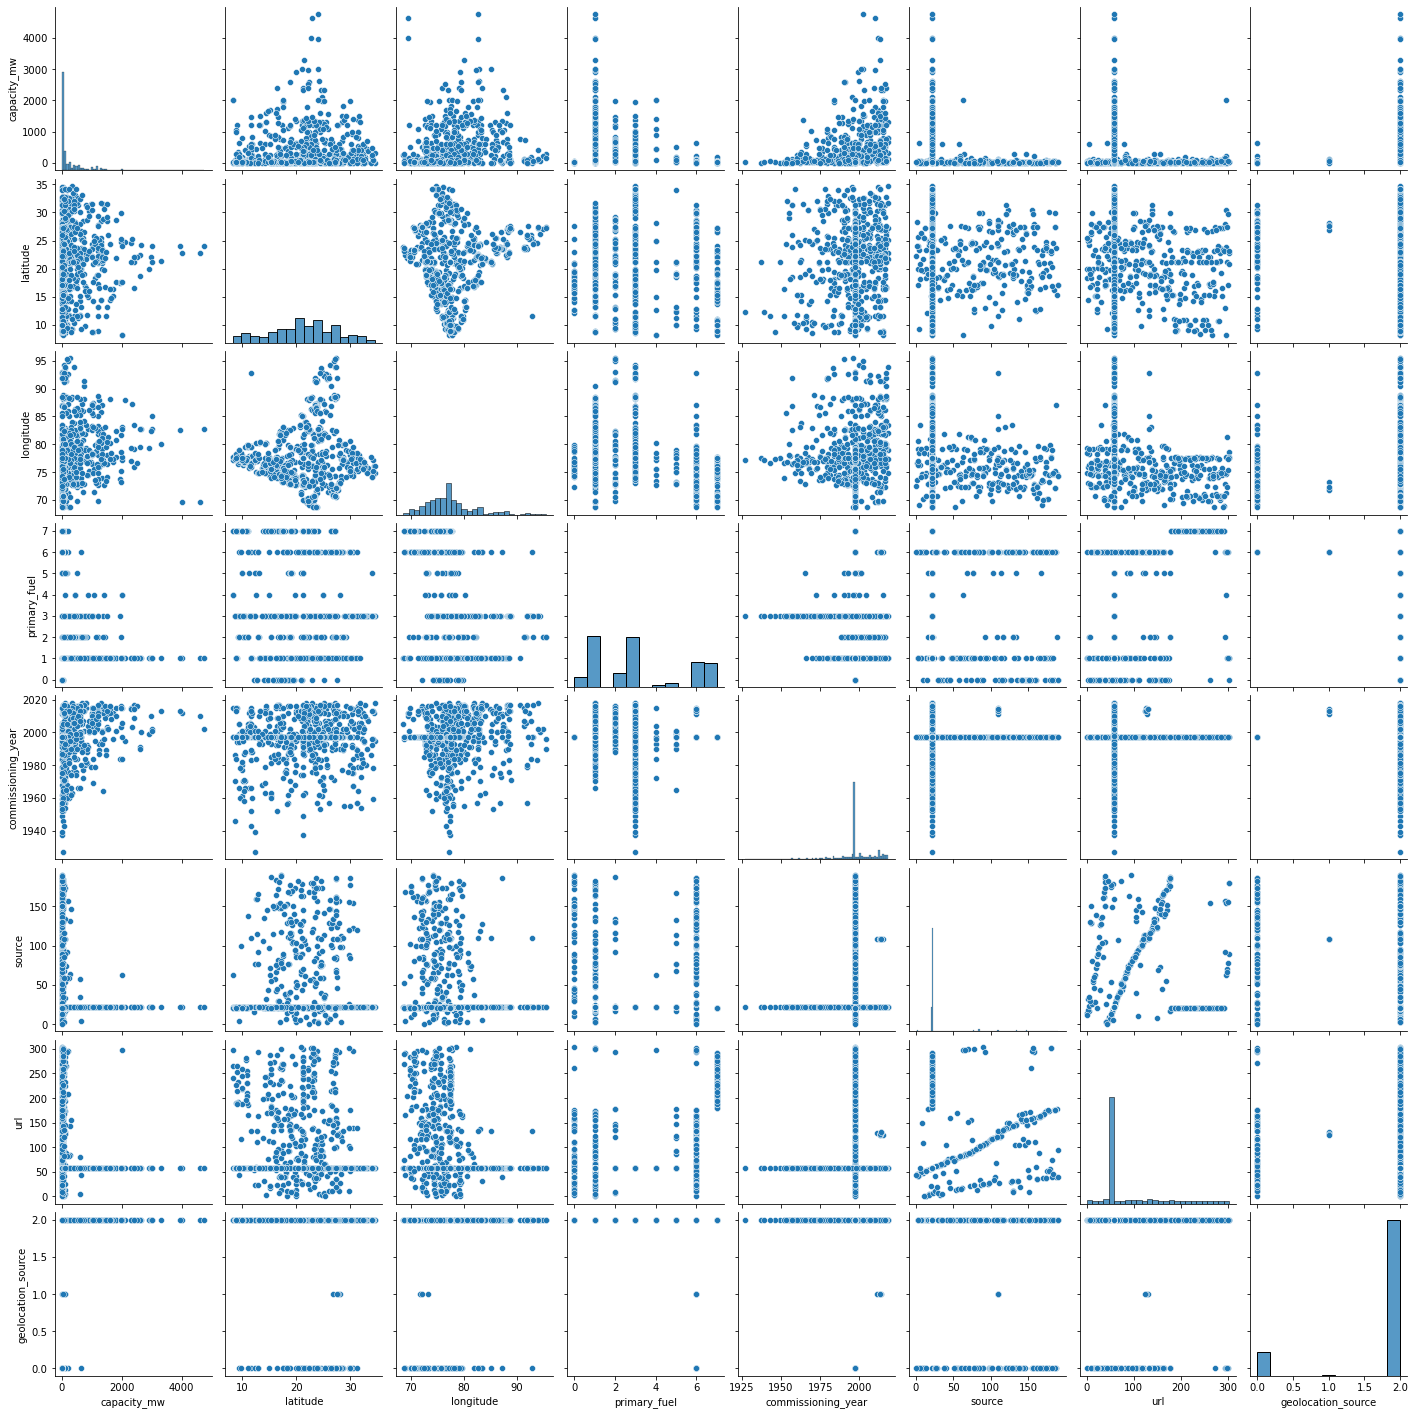

In [117]:
sns.pairplot(df)

# Correlation :

In [119]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.274292,-0.242122,-0.243830,0.204865
latitude,0.050984,1.000000,0.036362,-0.010204,0.102069,0.055927,-0.131038,-0.184275
longitude,0.195882,0.036362,1.000000,-0.347948,0.092331,-0.239333,-0.302985,0.252343
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-0.126650,0.053613,0.589886,-0.483217
commissioning_year,0.274292,0.102069,0.092331,-0.126650,1.000000,0.021528,0.010910,-0.007844
source,-0.242122,0.055927,-0.239333,0.053613,0.021528,1.000000,0.160144,-0.505720
url,-0.243830,-0.131038,-0.302985,0.589886,0.010910,0.160144,1.000000,-0.018929
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.007844,-0.505720,-0.018929,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

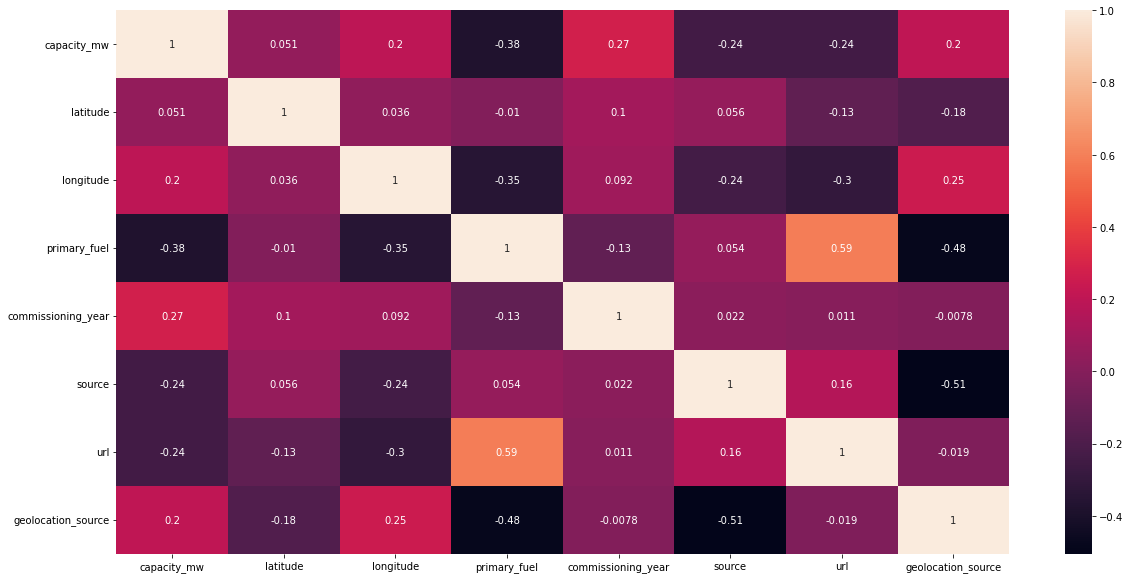

In [118]:
corr_hmap=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_hmap,annot=True)
plt.show

Max correlated  with Primary_fuel  = Url

min correlated  with Primary_fuel  = capacity_mw


Max correlated with capacity_mw  = commissioning_year

Min correlated with capacity_mw  = url



# Model Building And Saving

we have to divide into dependent and independent variables.

In [127]:
X = df.drop(['primary_fuel'],axis=1)
y = df['primary_fuel']

In [128]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, random_state=11)

In [129]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier
xgboost=XGBClassifier()  #Xtrim Gredient Boosting Classifier 

print("Model is created")

Model is created


In [130]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)

print("Model is trained")

Model is trained


In [132]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))
print("xgboost classification score",xgboost.score(X_train,y_train))


Lr classification score 0.668769716088328
knn classification score 0.7602523659305994
dt classification score 1.0
rf classification score 1.0
adb classification score 0.4637223974763407
svm classification score 0.5441640378548895
gdboost classification score 0.998422712933754
xgboost classification score 1.0


# Model Evaluation :

Using confusion matrix in order to evaluate the models accuracy.

In [133]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)
xgboost_yprad = xgboost.predict(X_test)

In [134]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[ 1  0  0  2  0  0 11  0]
 [ 0 50  0 16  0  0 13  2]
 [ 0  3  0 15  0  0  2  0]
 [ 0  7  0 75  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  1  0]
 [ 5  2  0  3  0  0 27  0]
 [ 0  0  0  0  0  0  0 31]]


In [135]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for knn_model",'\n',knn_conf_mat)

confusion matrix for knn_model 
 [[ 6  2  0  0  0  0  6  0]
 [ 4 48  5 16  1  0  5  2]
 [ 0  5  6  6  1  1  1  0]
 [ 0 19  3 59  1  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  0  3  0  1  0  0]
 [ 8  4  0  3  0  1 21  0]
 [ 0  0  0  0  0  0  0 31]]


In [136]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[12  2  0  0  0  0  0  0]
 [10 52  7 11  0  1  0  0]
 [ 1  4  4  8  1  2  0  0]
 [ 0  8  4 68  1  1  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  2  1  0  1  0  0]
 [ 1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0 31]]


In [137]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

confusion matrix for lr_model 
 [[13  1  0  0  0  0  0  0]
 [ 5 66  2  8  0  0  0  0]
 [ 1  4  7  8  0  0  0  0]
 [ 0  3  3 76  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  0  3  0  1  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 31]]


In [138]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

confusion matrix for lr_model 
 [[ 0  0  0 14  0  0  0  0]
 [ 0 27  0 54  0  0  0  0]
 [ 0  2  0 18  0  0  0  0]
 [ 0  5  0 77  0  0  0  0]
 [ 0  1  0  2  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  3  0  0  0  0 34  0]
 [ 0 31  0  0  0  0  0  0]]


In [139]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[ 0  0  0 14  0  0  0  0]
 [ 0 44  0 35  0  0  0  2]
 [ 0  2  0 18  0  0  0  0]
 [ 0  6  0 76  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0]
 [ 0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0  0 31]]


In [140]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[12  1  1  0  0  0  0  0]
 [ 3 71  1  6  0  0  0  0]
 [ 1  6  8  3  0  2  0  0]
 [ 0  2  0 79  0  1  0  0]
 [ 0  1  0  1  1  0  0  0]
 [ 0  1  0  3  0  1  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 31]]


In [141]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[14  0  0  0  0  0  0  0]
 [ 5 66  3  7  0  0  0  0]
 [ 1  5  7  6  0  1  0  0]
 [ 0  5  2 73  0  2  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  0  3  0  1  0  0]
 [ 0  2  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0 31]]


Checking classification report for each model:

In [142]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)

xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)


 lr classification_report 
               precision    recall  f1-score   support

           0       0.17      0.07      0.10        14
           1       0.77      0.62      0.68        81
           2       0.00      0.00      0.00        20
           3       0.65      0.91      0.76        82
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.50      0.73      0.59        37
           7       0.94      1.00      0.97        31

    accuracy                           0.67       273
   macro avg       0.38      0.42      0.39       273
weighted avg       0.61      0.67      0.63       273

 knn classification_report 
               precision    recall  f1-score   support

           0       0.33      0.43      0.38        14
           1       0.59      0.59      0.59        81
           2       0.43      0.30      0.35        20
           3       0.68      0.72      0.70        82
           4       0.

# K-Fold Cross Validation :¶

In [145]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [146]:
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,X,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=5).mean())

Mean of Cross validation score for gdboost  model => 0.8445449578046264
Cross validation score for xgboost model => 0.8445631716349947


As per above we can see our ‘xgboost’ model giving the less cross validation score. so we will consider this model is best for our prediction. Now will try hyperparameter tuning to check chances of accuracy increase.

# HyperParameter Tuning !

In [147]:
from sklearn.model_selection import GridSearchCV

In [149]:
parm_grid  = {'max_depth' : [3,4],
              'subsample' : [0.5,0.8],
              'learning_rate': [0.1],
              'min_child_weight' : [1,2],
              'random_state' : [4,5]}

parm_grid

{'max_depth': [3, 4],
 'subsample': [0.5, 0.8],
 'learning_rate': [0.1],
 'min_child_weight': [1, 2],
 'random_state': [4, 5]}

In [150]:
#giving above parameters to our model and behalf of this will train it again.
gridsearch = GridSearchCV(xgboost, param_grid = parm_grid , cv=5)
#fit the model using given paramters
gridsearch.fit(X_train,y_train)
#traning the model now

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012...
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4],
                         'min_child_weight': [1, 2], 'random_state': [4, 5],
                         'subsample': [0.5, 0.8]})

In [151]:
gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 2,
 'random_state': 4,
 'subsample': 0.5}

In [152]:
xgboost_tuning=XGBClassifier(learning_rate=0.1,max_depth=4,min_child_weight=2,random_state=4,subsample=0.8)

#Applying best parameters to our model
xgboost_tuning.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [153]:
#train the model
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [154]:
#predicting the values using test data
xgboost_tuning_yprad = xgboost_tuning.predict(X_test)

#printing the classification report
xgboost_report = classification_report(y_test,xgboost_tuning_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 xgboost classification_report 
               precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.82      0.83      0.82        81
           2       0.67      0.40      0.50        20
           3       0.82      0.91      0.87        82
           4       0.00      0.00      0.00         3
           5       0.33      0.20      0.25         5
           6       1.00      0.92      0.96        37
           7       1.00      1.00      1.00        31

    accuracy                           0.84       273
   macro avg       0.67      0.66      0.65       273
weighted avg       0.83      0.84      0.83       273



As we can observed in the hyper parameter tuning also we are getting almost same scores.

# Saving Model

In [155]:
import pickle
df_model = 'Gloabal_power.pickle'
pickle.dump(xgboost_tuning,open(df_model,'wb'))

In [156]:
X = df.drop(['capacity_mw'],axis=1)
y = df['capacity_mw']